### Initialize the generator and produce synthetic samples (approximate runtime: 30 seconds)

In [1]:
from curses import raw
import random
import sys
import os
import pandas as pd
import numpy as np

# Add the project root directory to the Python module search path
sys.path.append(os.path.abspath(".."))

# Import core module and configuration
import time_series_generator.core as tsg
import time_series_generator.config as cfg

data = pd.read_csv("/home/lisa4090/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/modified_data/resample_data.csv")
data = data["raw_data"].tolist()

data = np.array(data)
data = data[~np.isnan(data)]

random_seed = 42
np.random.seed(random_seed)

sample_seed = np.random.normal(loc=data.mean(), scale=data.std(), size=cfg.WINDOW_SIZE)

# Initialize the generator with configuration parameters
generator_random = tsg.Generator(
    window_size=cfg.WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed= sample_seed,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

# Initialize the generator with configuration parameters
generator_seed = tsg.Generator(
    window_size=cfg.WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed=cfg.SEED,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

# Initialize the generator with configuration parameters
generator_seed2 = tsg.Generator(
    window_size=cfg.WINDOW_SIZE,       # Length of each time series subsequence (default: 24)
    resolution=cfg.RESOLUTION,         # Time resolution of the data (default: '1h')
    seed=cfg.SEED2,                     # Input seed sequence (default: sampled from N(mean=40, std=20, size=window_size))
    n_sample=cfg.NSAMPLE               # Number of new samples to generate (default: 500)
)

In [2]:
# Generate samples from the estimated posterior distribution
sample_withseed = generator_seed.generate()
sample_withrandom = generator_seed2.generate()

### Visualization

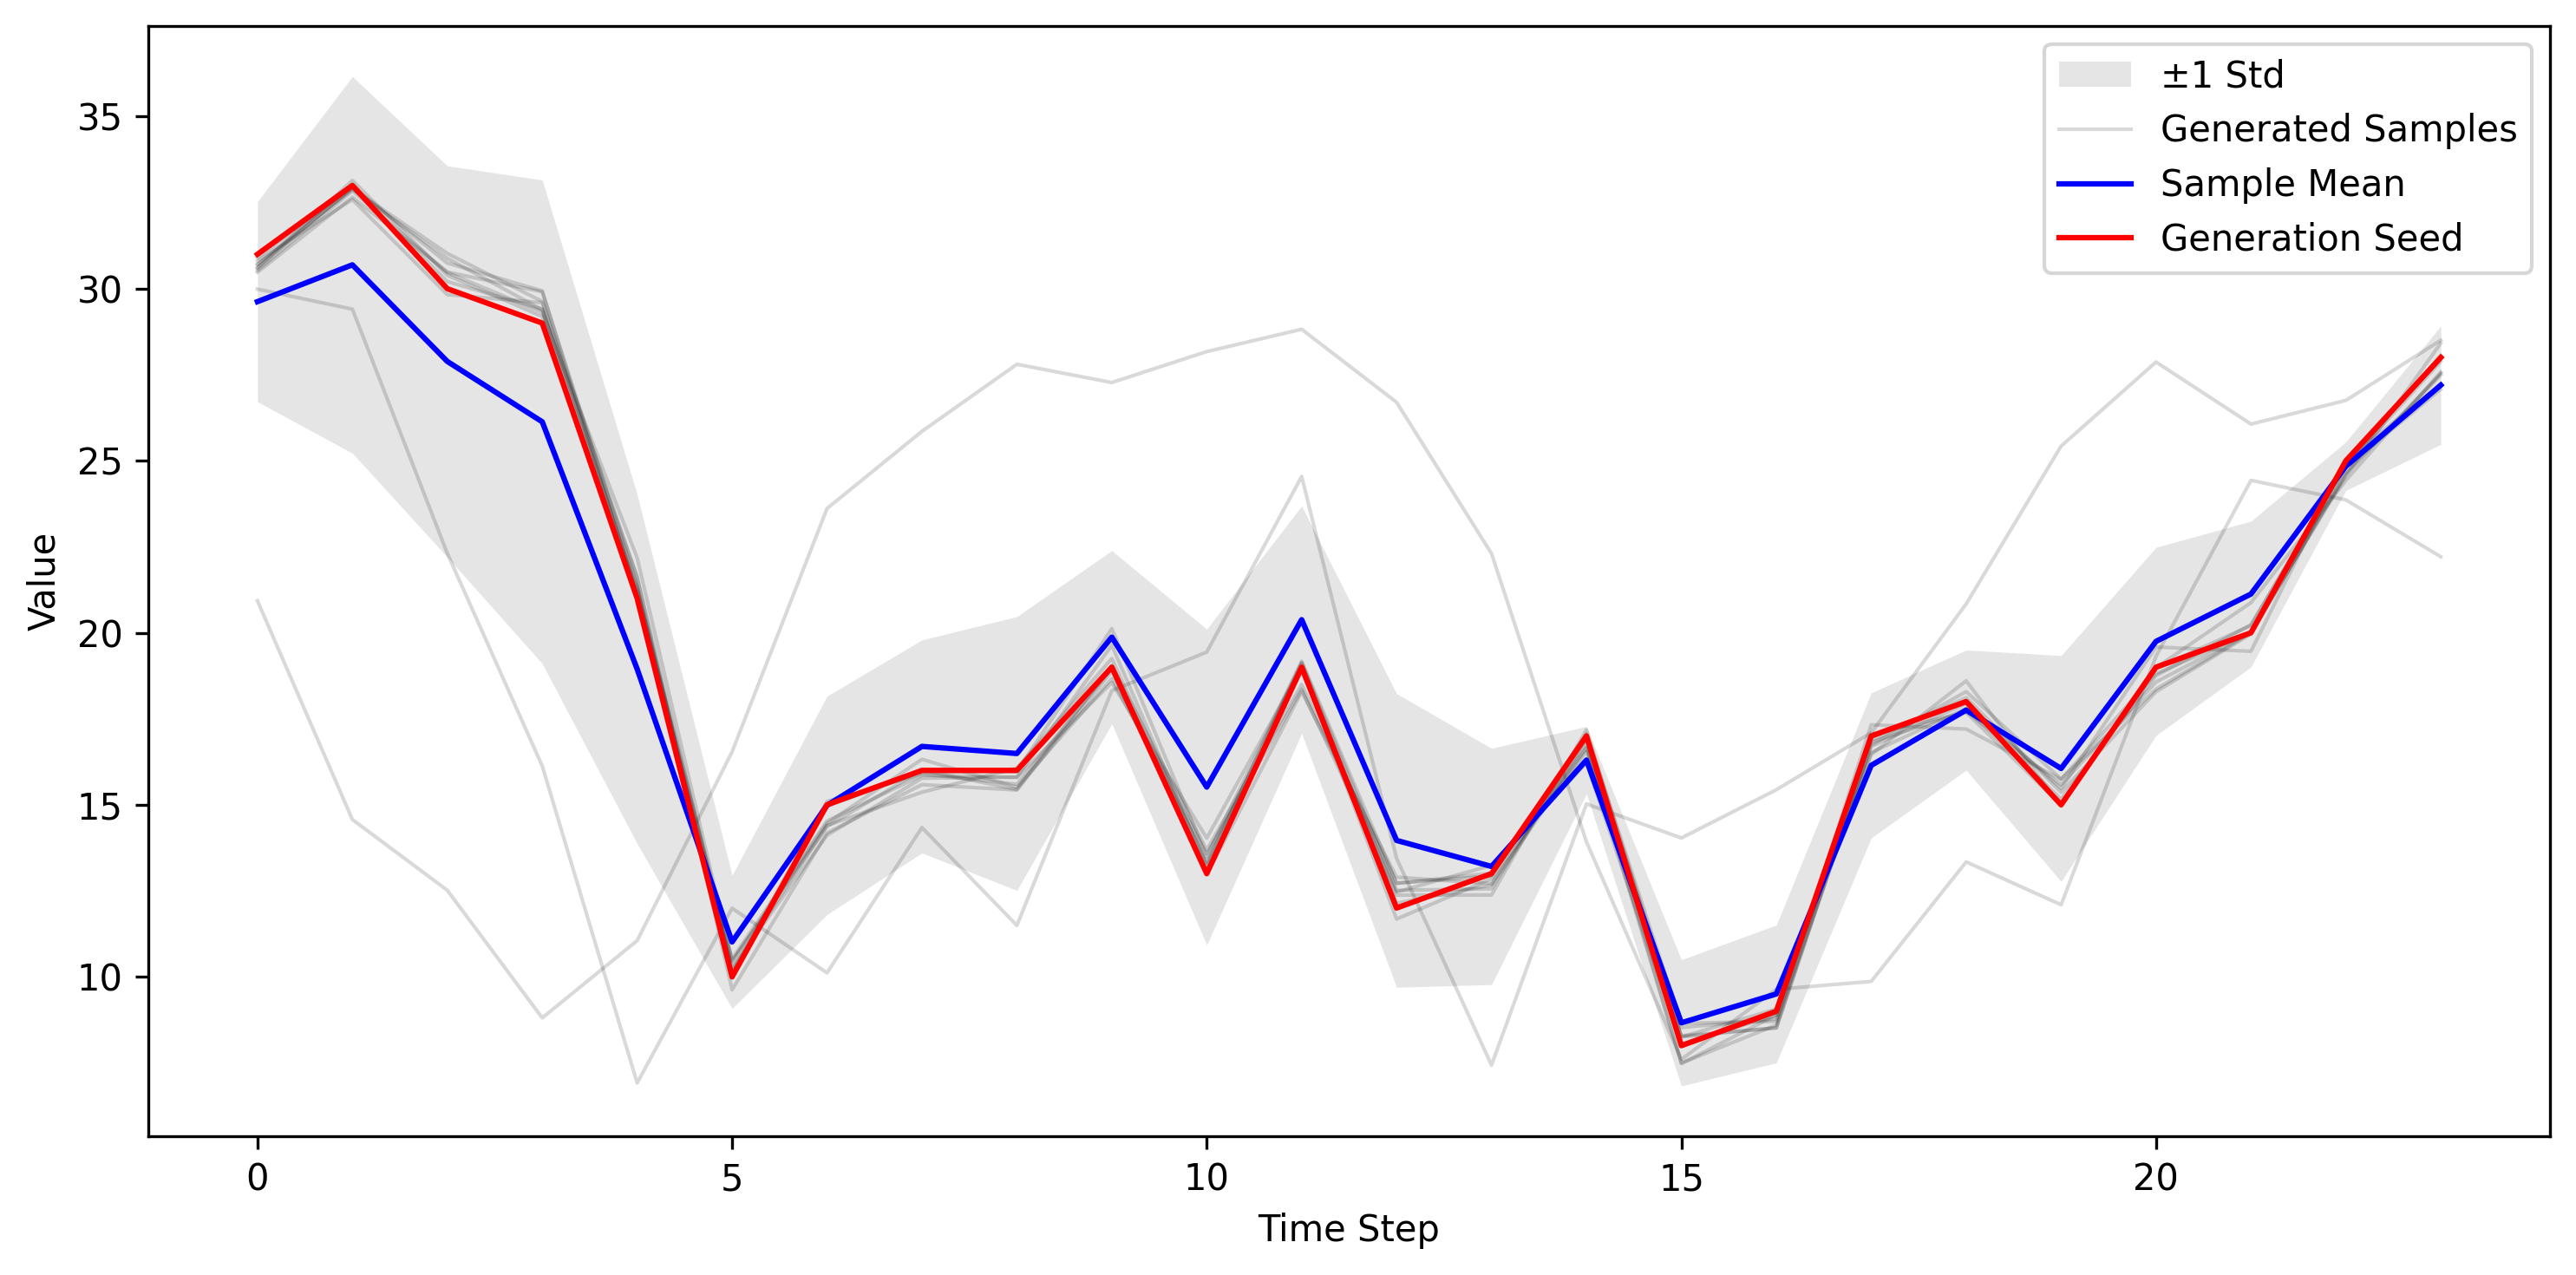

In [23]:
from turtle import width
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(sample_withseed, axis=0)
std_series = np.nanstd(sample_withseed, axis=0)

fig, ax = plt.subplots(figsize=(10, 5), dpi =300)

ax.fill_between(
    np.arange(sample_withseed.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.2,
    color="gray",
    label="±1 Std",
    linewidth=0
)

for idx, i in enumerate(sample_withseed):
    plt.plot(range(len(i)),i,color='black',alpha=0.15, linewidth=1,label = "Generated Samples" if idx == 0 else "")
    
plt.plot(mean_series, label="Sample Mean", linewidth=1.5, color="blue")
plt.plot(cfg.SEED, label="Generation Seed", linewidth=1.5, color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

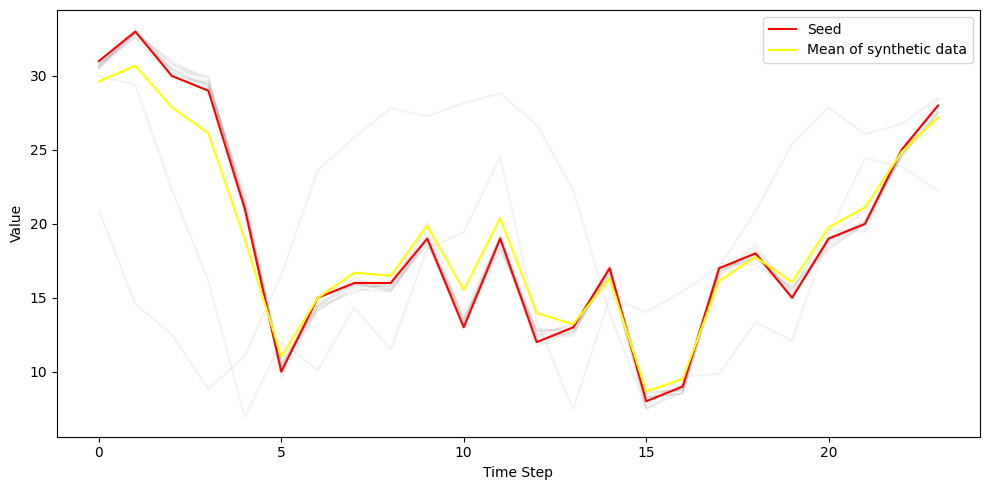

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(sample_withseed, axis=0)
std_series = np.nanstd(sample_withseed, axis=0)

plt.figure(figsize=(10, 5))
for i in sample_withseed:
    plt.plot(range(len(i)),i,color='black',alpha=0.05)

plt.plot(cfg.SEED, label="Seed", color="red")
plt.plot(mean_series, label="Mean of synthetic data", color="yellow")

# plt.plot(np.insert(cfg.SEED,0,[30,30,30,30]), label="Seed", color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

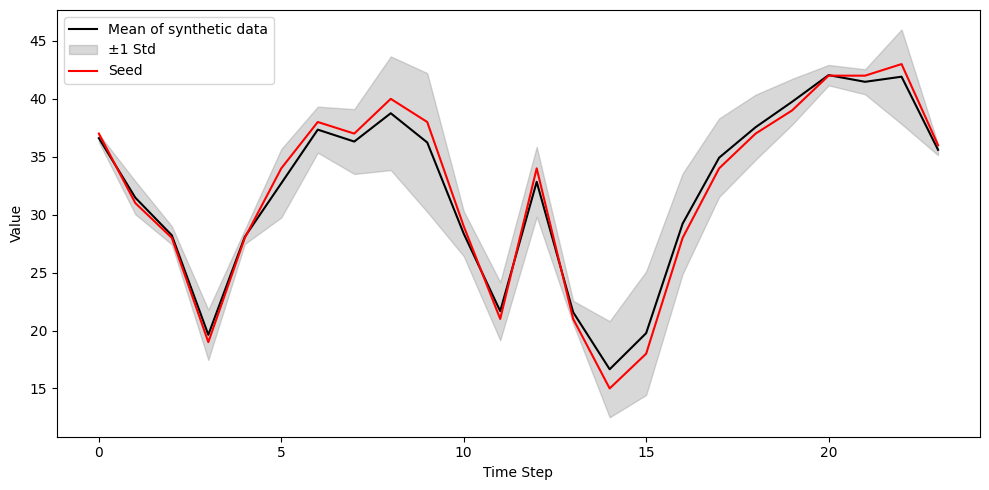

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(sample_withrandom, axis=0)
std_series = np.nanstd(sample_withrandom, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(mean_series, label="Mean of synthetic data", color="black")
plt.fill_between(
    np.arange(sample_withrandom.shape[1]),
    mean_series - 1*std_series,
    mean_series + 1*std_series,
    alpha=0.3,
    color="gray",
    label="±1 Std"
)
plt.plot(cfg.SEED2, label="Seed", color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

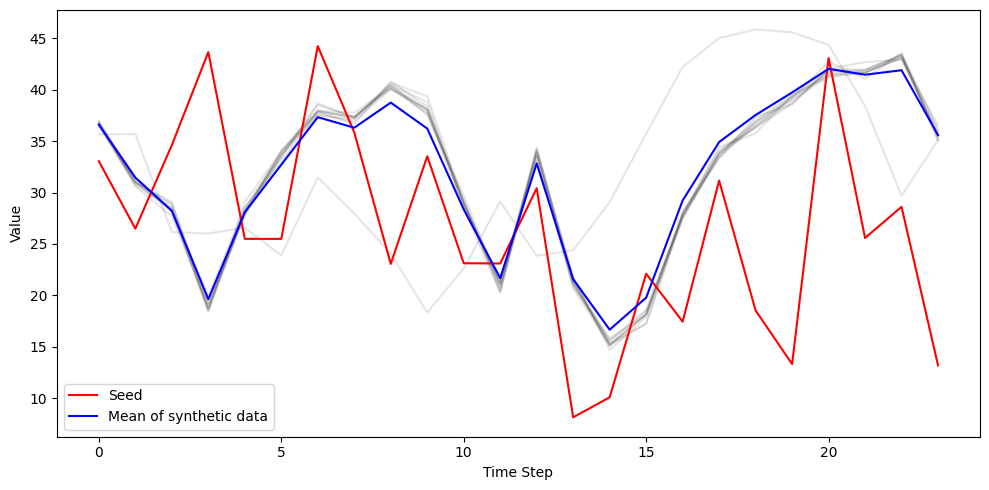

In [ ]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt

mean_series = np.nanmean(sample_withrandom, axis=0)
std_series = np.nanstd(sample_withrandom, axis=0)

plt.figure(figsize=(10, 5))
for i in sample_withrandom:
    plt.plot(range(len(i)),i,color='black',alpha=0.1)

plt.plot(cfg.SEED2, label="Seed", color="red")
plt.plot(mean_series, label="Mean of synthetic data", color="blue")

# plt.plot(np.insert(cfg.SEED,0,[30,30,30,30]), label="Seed", color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

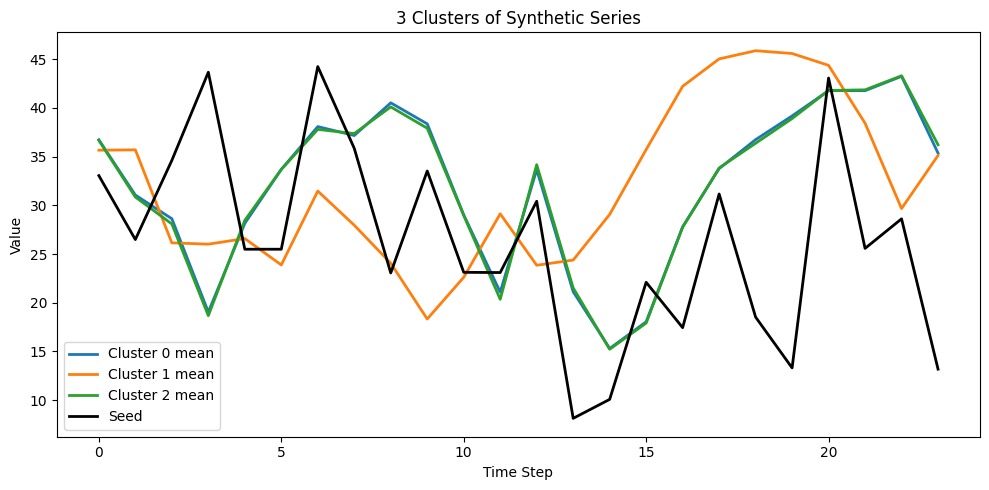

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# === choose your number of clusters ===
n_clusters = 3  # change this freely

# Flatten each time series into a feature vector (length = number of time steps)
X = np.array(sample_withrandom)

# === run KMeans ===
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# === visualize clusters ===
plt.figure(figsize=(10, 5))
for cluster_id in range(n_clusters):
    cluster_samples = X[labels == cluster_id]
    for series in cluster_samples:
        plt.plot(series, color=f"C{cluster_id}", alpha=0.005)
    plt.plot(np.mean(cluster_samples, axis=0), color=f"C{cluster_id}",
             label=f"Cluster {cluster_id} mean", linewidth=2)

plt.plot(sample_seed, color="black", label="Seed", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.title(f"{n_clusters} Clusters of Synthetic Series")
plt.tight_layout()
plt.show()


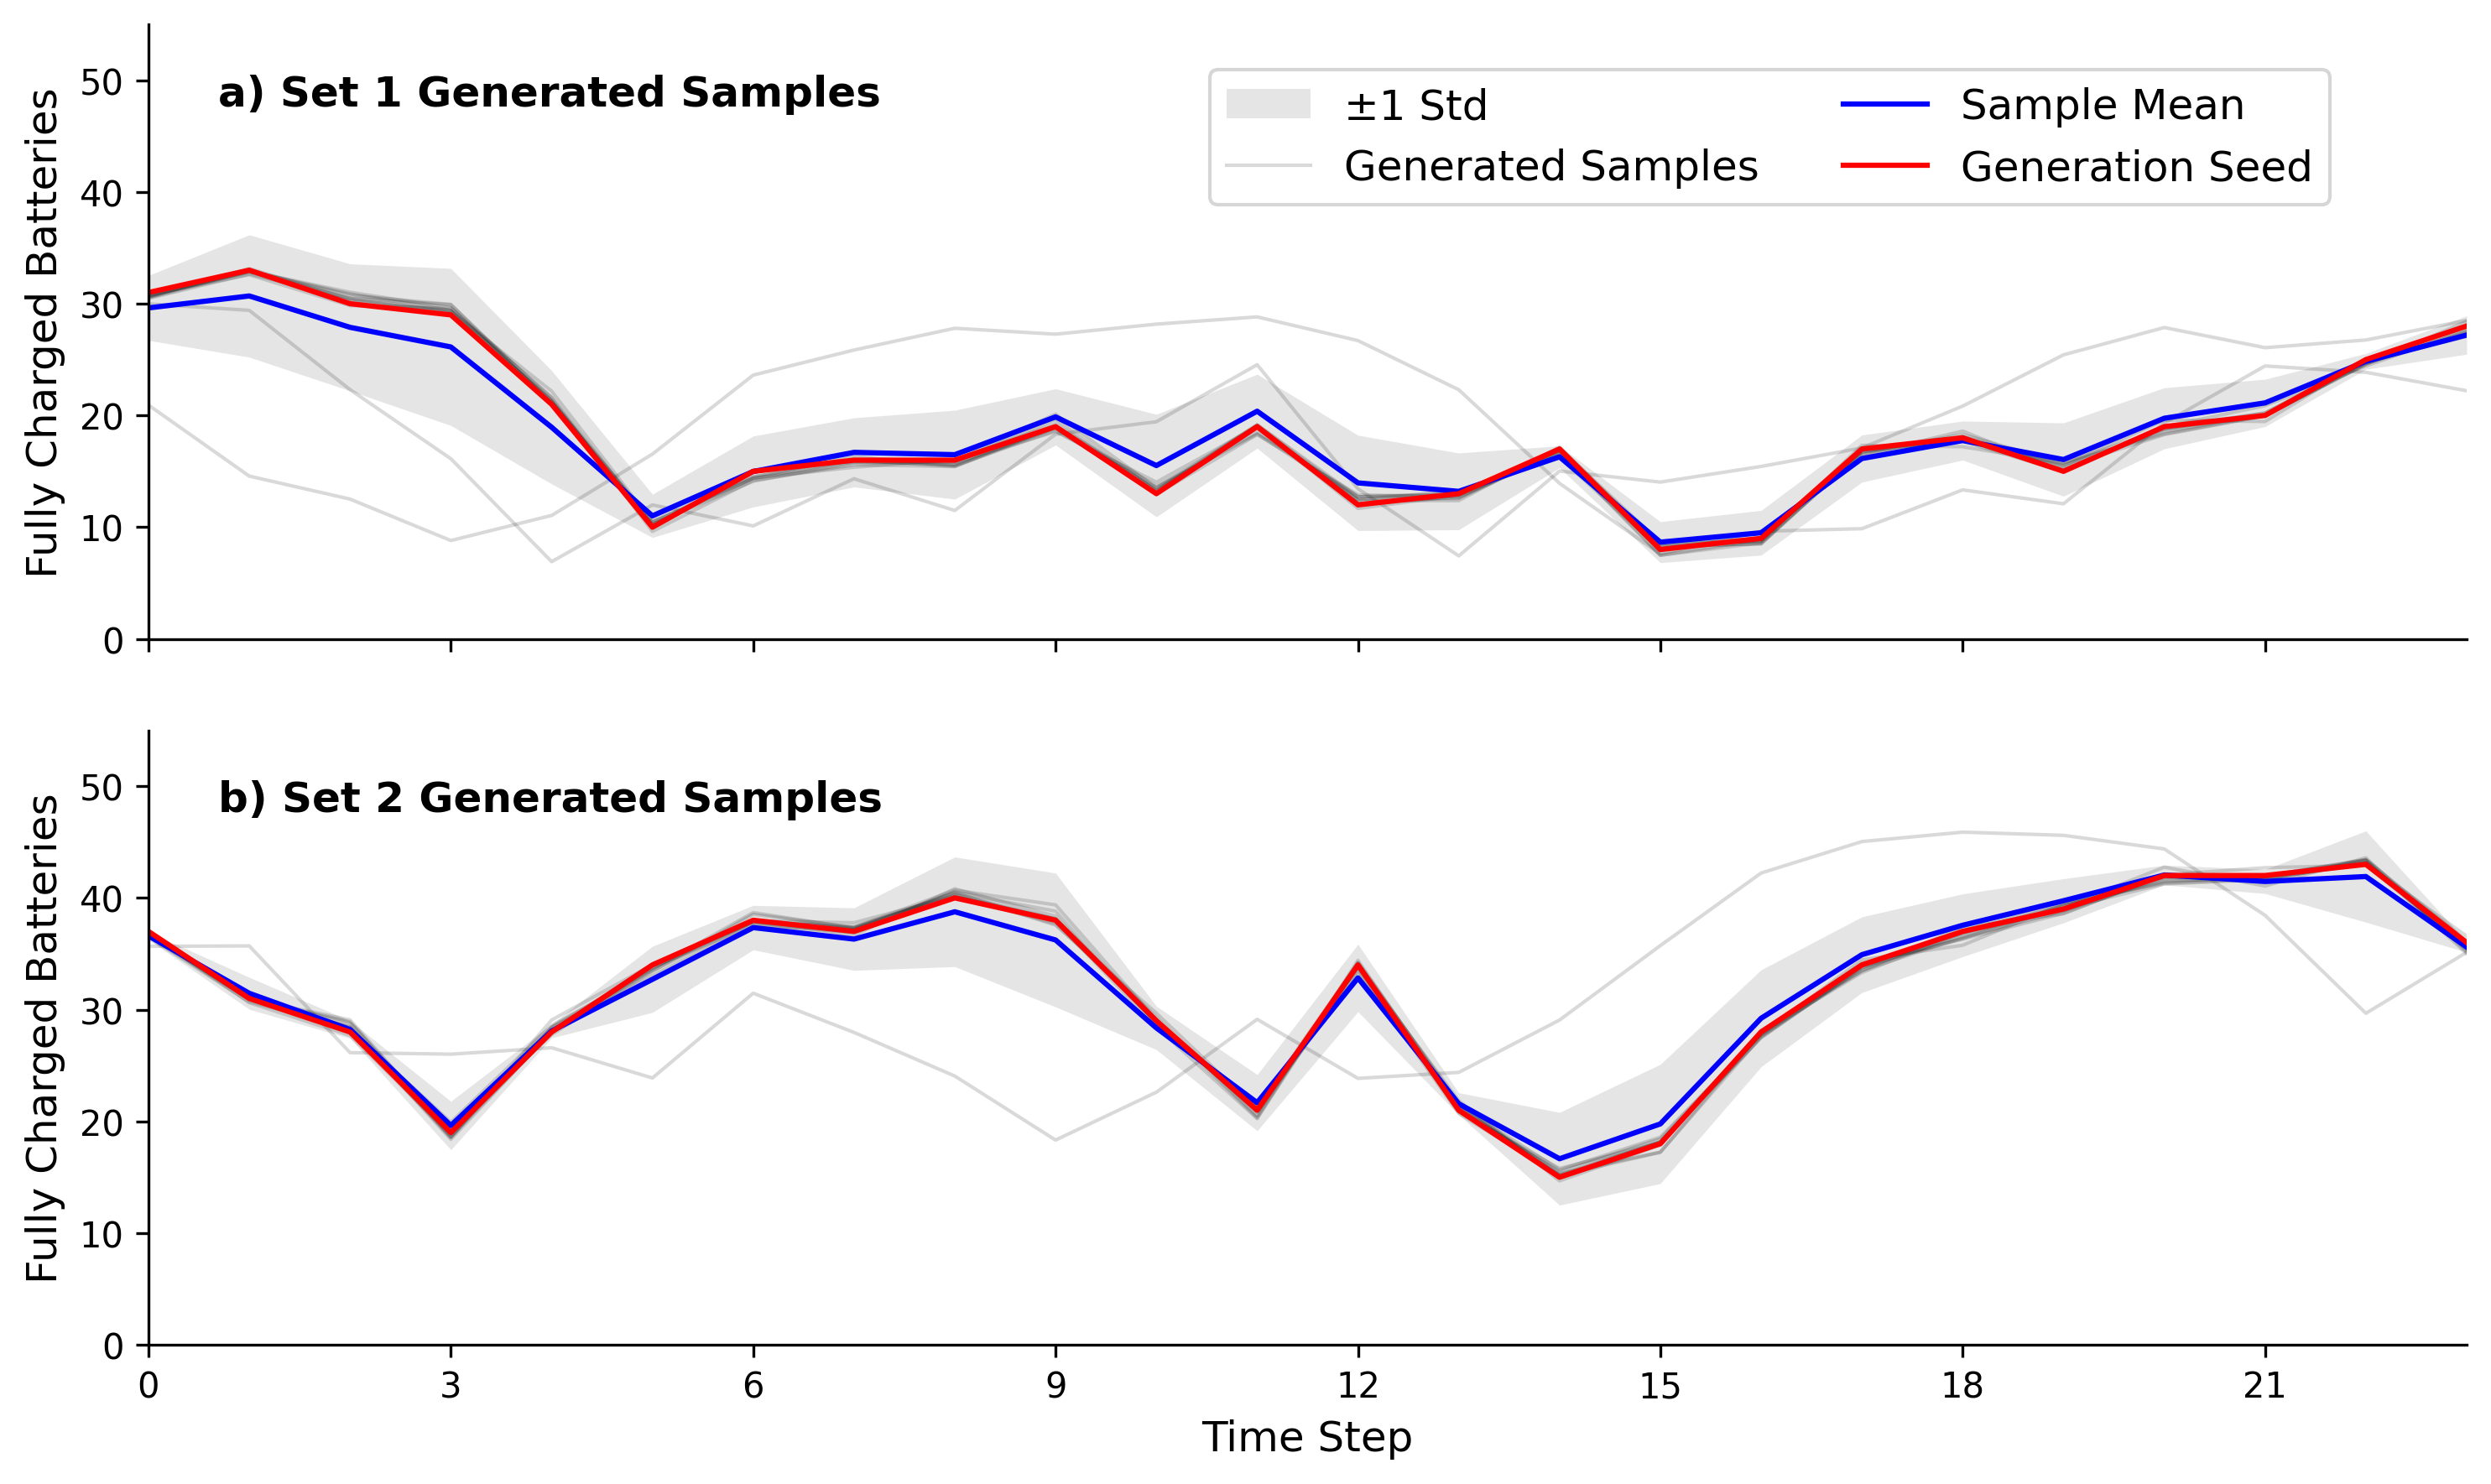

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# === First dataset ===
mean1 = np.nanmean(sample_withseed, axis=0)
std1 = np.nanstd(sample_withseed, axis=0)

# === Second dataset ===
mean2 = np.nanmean(sample_withrandom, axis=0)
std2 = np.nanstd(sample_withrandom, axis=0)

# === Plot ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=300, sharex=True)

# ---------- Top subplot ----------
ax = axes[0]
ax.fill_between(
    np.arange(sample_withseed.shape[1]),
    mean1 - std1,
    mean1 + std1,
    alpha=0.2,
    color="gray",
    label="±1 Std",
    linewidth=0
)
for idx, series in enumerate(sample_withseed):
    ax.plot(range(len(series)), series, color='black', alpha=0.15, linewidth=1,
            label="Generated Samples" if idx == 0 else "")
ax.plot(mean1, label="Sample Mean", linewidth=1.5, color="blue")
ax.plot(cfg.SEED, label="Generation Seed", linewidth=1.5, color="red")
ax.set_ylabel("Fully Charged Batteries", fontsize=12)
ax.text(0.03, 0.92, "a) Set 1 Generated Samples", transform=ax.transAxes, ha="left", va="top", fontsize=12, weight="bold")
ax.legend(ncol=2, loc = 'upper right', bbox_to_anchor=(0.95, 0.96), fontsize=12)

# ---------- Bottom subplot ----------
ax = axes[1]
ax.fill_between(
    np.arange(sample_withrandom.shape[1]),
    mean2 - std2,
    mean2 + std2,
    alpha=0.2,
    color="gray",
    label="±1 Std",
    linewidth=0
)
for idx, series in enumerate(sample_withrandom):
    ax.plot(range(len(series)), series, color='black', alpha=0.15, linewidth=1,
            label="Generated Samples" if idx == 0 else "")
ax.plot(mean2, label="Sample Mean", linewidth=1.5, color="blue")
ax.plot(cfg.SEED2, label="Generation Seed", linewidth=1.5, color="red")
ax.set_xlabel("Time Step", fontsize=12)
ax.set_ylabel("Fully Charged Batteries", fontsize=12)
ax.text(0.03, 0.92, "b) Set 2 Generated Samples", transform=ax.transAxes, ha="left", va="top", fontsize=12, weight = "bold")
# ax.legend()

axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[0].set_ylim(0, 55)
axes[1].set_ylim(0, 55)

ax.set_xlim(0, cfg.WINDOW_SIZE - 1)
ax.set_xticks(np.arange(0, cfg.WINDOW_SIZE, step=cfg.WINDOW_SIZE // 8))
# ---------- Layout ----------
plt.tight_layout(h_pad=2.0)
plt.show()
